# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import LogNorm

In [2]:
import warnings
warnings.filterwarnings('ignore')

Load feature names.

In [3]:
feature_names = []
with open('data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

with open('data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

Fraction of variance explained by first 50 principal components:
#1: 0.16404
#2: 0.13323
#3: 0.10173
#4: 0.07063
#5: 0.03867
#6: 0.03681
#7: 0.03128
#8: 0.02734
#9: 0.02616
#10: 0.02231
#11: 0.02048
#12: 0.01868
#13: 0.01734
#14: 0.01684
#15: 0.01519
#16: 0.01509
#17: 0.01429
#18: 0.01412
#19: 0.01325
#20: 0.01146
#21: 0.01071
#22: 0.01066
#23: 0.01041
#24: 0.00994
#25: 0.00908
#26: 0.00869
#27: 0.00796
#28: 0.00776
#29: 0.00738
#30: 0.00700
#31: 0.00641
#32: 0.00615
#33: 0.00572
#34: 0.00534
#35: 0.00526
#36: 0.00503
#37: 0.00499
#38: 0.00456
#39: 0.00453
#40: 0.00440
#41: 0.00419
#42: 0.00398
#43: 0.00370
#44: 0.00360
#45: 0.00338
#46: 0.00299
#47: 0.00272
#48: 0.00236
#49: 0.00221
#50: 0.00204


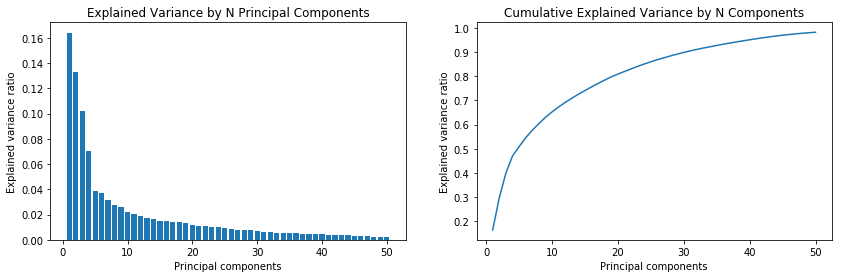

In [5]:
def P1():
    
### STUDENT START ###

    n_components = np.arange(1,51)
    individuals = []
    cumulatives = []

    # Fit Principal Component Analysis (PCA) 
    pca = PCA(n_components=50)
    pca.fit(train_data)
    
    print('Fraction of variance explained by first 50 principal components:')

    # Cumulative sum of variance explained for each n_compoents
    for i, n in enumerate(n_components):
        individuals.append(pca.explained_variance_ratio_[i])
        cumulative = np.sum(pca.explained_variance_ratio_[:n])
        cumulatives.append(cumulative)
        print('#{}: {:.5f}'.format(n, pca.explained_variance_ratio_[i]))

    # Plot explained variance by individual component
    fig, axes = plt.subplots(1,2, figsize = (14,4))
    
    axes[0].bar(n_components, individuals)
    axes[0].set_title('Explained Variance by N Principal Components')
    axes[0].set_ylabel('Explained variance ratio')
    axes[0].set_xlabel('Principal components')
    
    # Plot cumulative explained variance
    axes[1].plot(n_components, cumulatives)
    axes[1].set_title('Cumulative Explained Variance by N Components')
    axes[1].set_ylabel('Explained variance ratio')
    axes[1].set_xlabel('Principal components')
    
### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

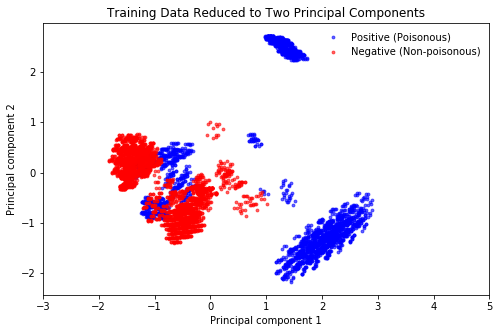

In [14]:
def P2():
    
### STUDENT START ###

    # PCA - fit and transform to 2-dimensions
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)

    # Poisonous and non-poinsonous types
    poison = train_data_pca[train_labels == 1]
    not_poison = train_data_pca[train_labels == 0]

    # Plot mushroom types
    fig, ax = plt.subplots(figsize = (8,5))
    plt.scatter(poison[:,0], poison[:,1], color='blue', s=8, alpha=0.6, label='Positive (Poisonous)')
    plt.scatter(not_poison[:,0], not_poison[:,1], color='red', s=8, alpha=0.6, label='Negative (Non-poisonous)')

    ax.set_title('Training Data Reduced to Two Principal Components')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.legend(loc='upper right', frameon=False)
    ax.set_xlim(-3, 5)

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

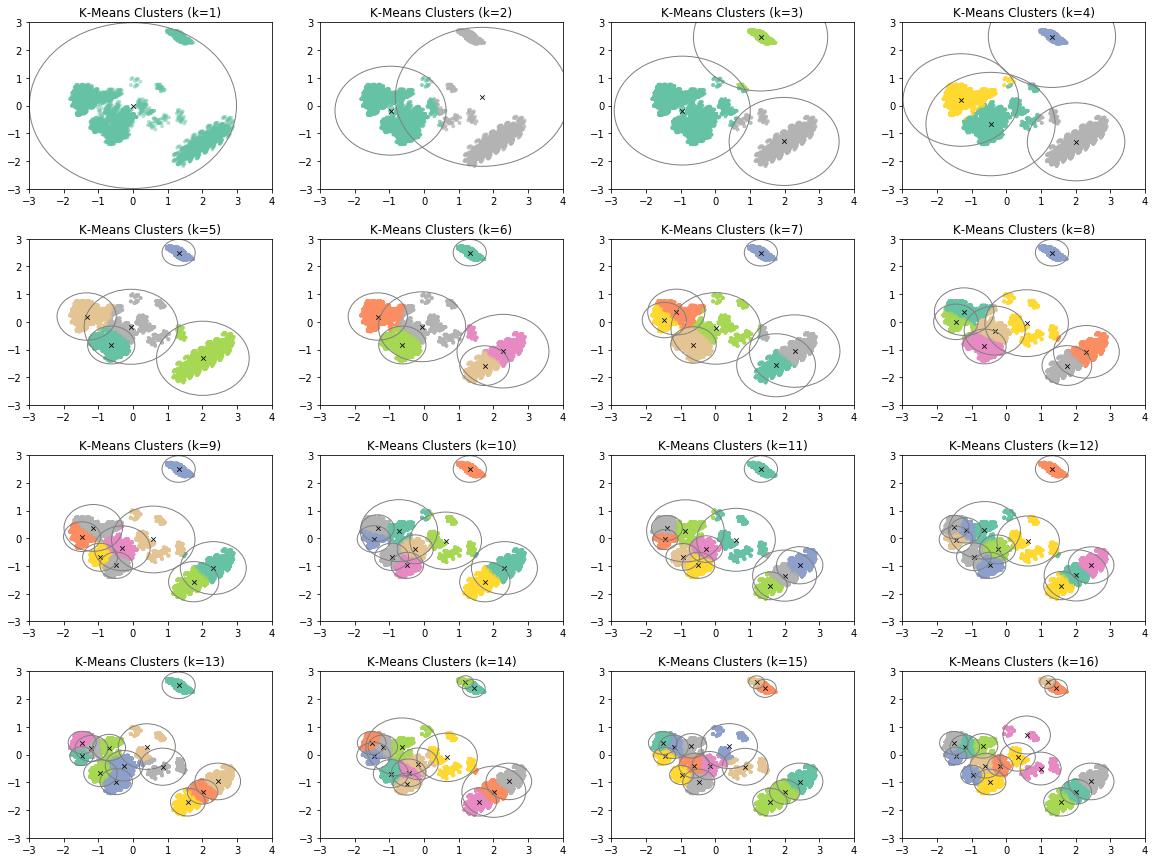

In [7]:
def P3():

### STUDENT START ###

    # PCA train data to 2 components
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)

    # Plot projected train data
    fig, axes = plt.subplots(4,4, figsize = (20,15))
    fig.subplots_adjust(hspace=0.3)

    cmap = plt.get_cmap('Set2')

    # Loop through each set of clusters
    for i, k in enumerate(np.arange(1,17)):  

        # K-Means fitted to pca data
        k_means = KMeans(n_clusters=k, random_state=0)
        clusters = k_means.fit(train_data_pca)

        # Extract certain attributes
        labels = k_means.labels_.astype(float)
        centroids = clusters.cluster_centers_

        # Unravel axes for plotting
        ax = axes.ravel()[i]

        # Set axis properties
        ax.set_title('K-Means Clusters (k={})'.format(k))
        ax.set_xlim(-3, 4)
        ax.set_ylim(-3, 3)

        # Loop through each cluster in set
        for ii, centroid in enumerate(centroids):

            # Plot cluster
            ax.scatter(train_data_pca[:,0], train_data_pca[:,1], c=labels, cmap=cmap, s=8, alpha=0.4)

            # Calculate distances 
            distances = clusters.transform(train_data_pca)
            max_distance = np.max(distances[labels == ii, ii])

            # Plot circles approximating clusters
            circle = plt.Circle(centroid, radius = max_distance, fill=False, edgecolor='grey')
            ax.add_patch(circle)

        # Plot centroids
        ax.scatter(centroids[:,0], centroids[:,1], marker='x', color='black', s=20, lw=0.8)
        
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

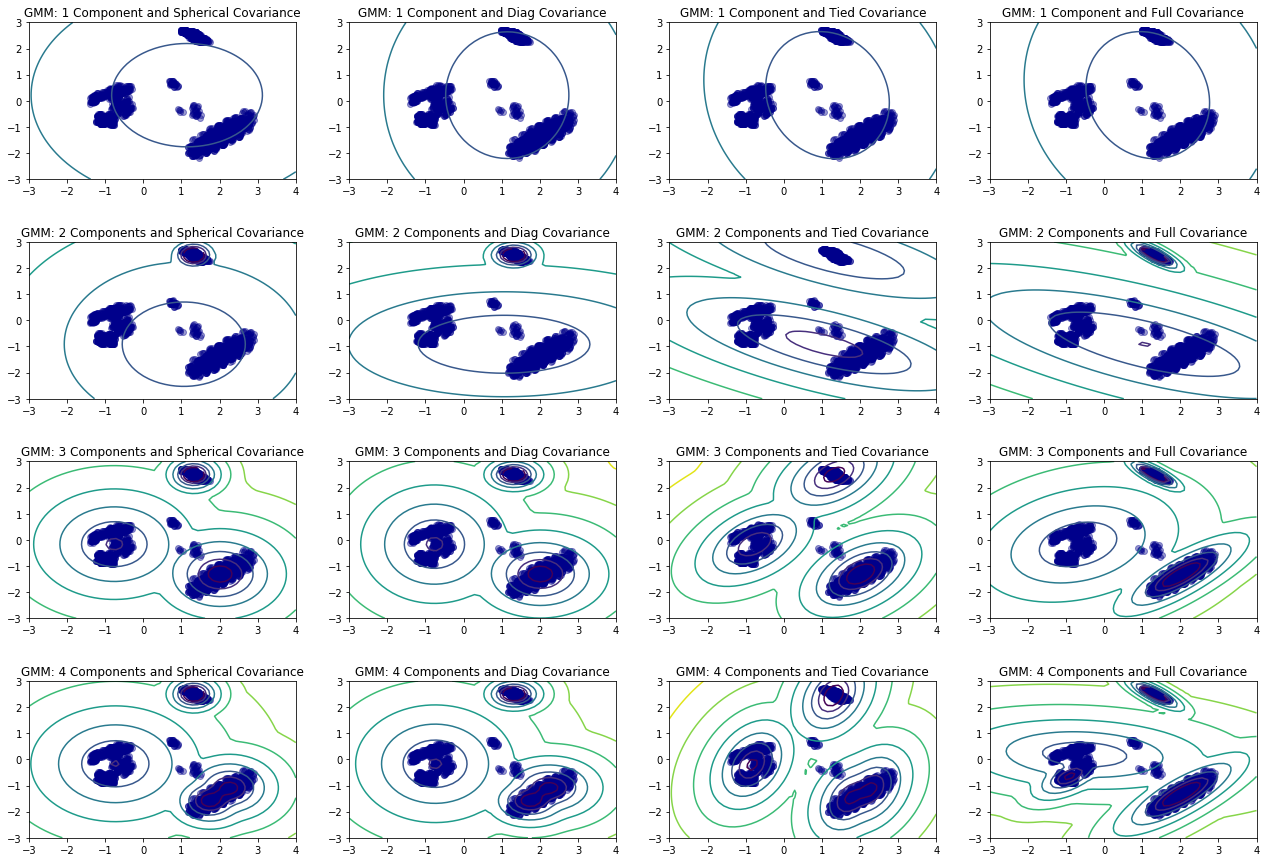

In [8]:
def P4():
    
### STUDENT START ###

    # PCA train data to 2 components
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)

    # Poisonous types
    train_pca_positive = train_data_pca[train_labels == 1]

    # Plot projected train data
    fig, axes = plt.subplots(4,4, figsize = (22,15))
    fig.subplots_adjust(hspace=0.4)
    
    # Loop through components and covaraince types
    for i, n_component in enumerate(np.arange(1,5)):
        for ii, covar_type in enumerate(['spherical', 'diag', 'tied', 'full']):

            # Fit Gaussian Mixture Model for poisonous types
            gmm = GMM(n_components=n_component, covariance_type=covar_type)
            gmm.fit(train_pca_positive)

            x = np.linspace(-3., 4.)
            y = np.linspace(-3., 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            # Set active axis
            ax = axes[i, ii]

            # Plt train data and GMM contours
            ax.scatter(train_pca_positive[:, 0], train_pca_positive[:, 1], color='darkblue', alpha=0.4)
            CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0), levels=np.logspace(0, 3, 12))

            # Set axis titles
            if n_component == 1:
                ax.set_title('GMM: {} Component and {} Covariance'.format(n_component, covar_type.capitalize()))
            else:
                ax.set_title('GMM: {} Components and {} Covariance'.format(n_component, covar_type.capitalize()))
            
            #CB = plt.colorbar(CS, cax=ax, shrink=0.8, extend='both')

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
def P5():

### STUDENT START ###

    # PCA train data to 2 components
    pca = PCA(n_components=2)

    # PCA train/test data
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Positive/negative label, indicating if poisonous
    train_pca_positive = train_data_pca[train_labels == 1]
    train_pca_negative = train_data_pca[train_labels == 0]

    # Gaussian Mixture Model
    gmm = GMM(n_components=4, covariance_type='full')

    # Fit GMM for postives
    gmm_pos = gmm.fit(train_pca_positive)
    probs_positive = gmm_pos.score_samples(test_data_pca)

    # Fit GMM for negatives
    gmm_neg = gmm.fit(train_pca_negative)
    probs_negative = gmm_neg.score_samples(test_data_pca)

    # Make predictions
    pred_labels = probs_positive > probs_negative
    pred_probs = probs_positive if probs_positive is True else probs_negative

    # Accuracy of model
    accuracy = metrics.accuracy_score(test_labels, pred_labels)
    print('Accuracy: {:.4f}'.format(accuracy))

### STUDENT END ###    
    
P5()

Accuracy: 0.9368


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [17]:
def calculate_accuracy(n_pca, n_gmm, covar_type):
    '''Accepts inputs of number of pca components (n_pca), number of
    GMM components (n_gmm) and the covariance type. Outputs the
    resulting accuracy of the model based on input parameters.
    '''
    
    # PCA train data to n_components
    pca = PCA(n_components=n_pca)

    # PCA train/test data
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Positive/negative label, indicating if poisonous
    train_pca_positive = train_data_pca[train_labels == 1]
    train_pca_negative = train_data_pca[train_labels == 0]

    # Gaussian Mixture Model
    gmm = GMM(n_components=n_gmm, covariance_type=covar_type)

    # Fit GMM for postives
    gmm_pos = gmm.fit(train_pca_positive)
    probs_positive = gmm_pos.score_samples(test_data_pca)

    # Fit GMM for negatives
    gmm_neg = gmm.fit(train_pca_negative)
    probs_negative = gmm_neg.score_samples(test_data_pca)

    # Make predictions
    pred_labels = probs_positive > probs_negative
    pred_probs = probs_positive if probs_positive is True else probs_negative

    # Accuracy of model
    accuracy = metrics.accuracy_score(test_labels, pred_labels)
    
    return accuracy

In [18]:
def calculate_parameters(n_pca, n_gmm, covar_type):
    '''Accepts inputs of number of pca components (n_pca), number of
    GMM components (n_gmm) and the covariance type. Outputs the
    resulting number of parameters based on the inputs supplied.
    '''
    if covar_type == 'full':
        n_covar =  (n_pca*(n_pca+1) / 2) * n_gmm
    elif covar_type == 'diag':
        n_covar = n_pca * n_gmm
    elif covar_type == 'spherical':
        n_covar = n_gmm
    elif covar_type == 'tied':
        n_covar = n_pca**2
        
    return int(n_pca * n_gmm + n_covar) * 2

In [19]:
def P6():

### STUDENT START ###

    # Table header
    print('---'*19)
    print('{:1s} {:<7s} {:<7s} {:<14s} {:<12} {:<9s}'.format('','PCA', 'GMM', 'Covariance', 'Parameters', 'Accuracy'))
    print('---'*19)

    results = {}

    # Loop through input parameters
    for n_pca in np.arange(1,7):
        for n_gmm in np.arange(1,7):
            for covar_type in ['spherical', 'diag', 'tied', 'full']:

                # Calculate number of parameters & accuracy
                parameters = calculate_parameters(n_pca=n_pca, n_gmm=n_gmm, covar_type=covar_type)
                if parameters > 50:
                    continue
                else:
                    # Compile dictionary of results - accuracy/param combinations
                    accuracy = calculate_accuracy(n_pca=n_pca, n_gmm=n_gmm, covar_type=covar_type)
                    params = [n_pca, n_gmm, covar_type, parameters]
                    results[accuracy] = params
    
    # Print results in descending order
    for key, params in sorted(results.items(), reverse=True):
        print('{:1s} {:<7d} {:<7d} {:<14s} {:<12d} {:.4f}'.format('', params[0], params[1], params[2], params[3], key))
        
    # State most accurate parameters
    max_accuracy = max(results, key=results.get)   
    print('---'*18)    
    print('\nParameters resulting in the greatest accuracy')
    print('Accuracy: {:.4f}'.format(max_accuracy))
    print('PCA:', results[max_accuracy][0])
    print('GMM:', results[max_accuracy][1])
    print('Covariance Type:', results[max_accuracy][2])
    print('Parameters:', results[max_accuracy][3])

### STUDENT END ###

P6()

---------------------------------------------------------
  PCA     GMM     Covariance     Parameters   Accuracy 
---------------------------------------------------------
  6       3       spherical      42           0.9680
  5       3       spherical      36           0.9662
  5       4       spherical      48           0.9635
  3       4       spherical      32           0.9600
  4       4       spherical      40           0.9573
  3       6       spherical      48           0.9555
  4       5       spherical      50           0.9537
  2       5       full           50           0.9511
  3       4       tied           42           0.9502
  3       5       tied           48           0.9493
  2       6       spherical      36           0.9475
  5       1       full           40           0.9457
  2       4       tied           24           0.9448
  2       6       diag           48           0.9440
  2       4       diag           32           0.9431
  2       6       tied           